# Loading Libraries

dynamics in the base library for all structure network computation. 

```
import sys
sys.path.append('..')
```

Ensures the dynamics package can be imported.

In [1]:
import sys
sys.path.append("..")

import os
import numpy as np
import nglview as ngl
import networkx as nx
import structure_network as dyn
import matplotlib.pyplot as plt

# Loading PDB file

Loading pdb of *1A1V* chain A. 

In [2]:
pdbfile = os.path.join('data', 'pdbs', '1A1V.pdb')

assert os.path.isfile(pdbfile)

In [3]:
pdb = dyn.read_pdb(pdbfile)[0]['A']

In [4]:
catrace = dyn.pdb_to_catrace(pdb)

# Creating Structure Network


`CANetwork` produces $C_\alpha - C_\alpha$ contact network. The network generation uses various parameters, viz. `distance_threshold`, and `energy_threshold`. Distance threshold is the maximum distance bound in angstrom to draw an edge in the network. Energy threshold is the minimum contact energy value needed to be consided as a valid contact. `theshold_type` dynamically change the thresholding conditions. The `potential` parameter provides a choice for pair potential selection, supported potentials are *MJ* and *CHARMM*.

In [5]:
network = dyn.CANetwork(structure=catrace, 
                        distance_threshold=11, 
                        energy_threshold=3.0, 
                        threshold_type=dyn.ThresholdTypes.distance,
                        contact_type=dyn.ContactTypes.all_contacts, 
                        potential=dyn.PairPotential.charmm)

In [6]:
display("Structure diameter: {:8.3f}".format(network.structure_diameter))
display("Network diameter:   {:8.3f}".format(network.network_diameter))
display("Structure centroid: {:8.3f}, {:8.3f} {:8.3f}".format(*network.centroid))
display("Radius of gyration: {:8.3f}".format(network.radius_of_gyration))

'Structure diameter:   66.805'

'Network diameter:      8.000'

'Structure centroid:   25.505,   25.758   14.499'

'Radius of gyration:   23.337'

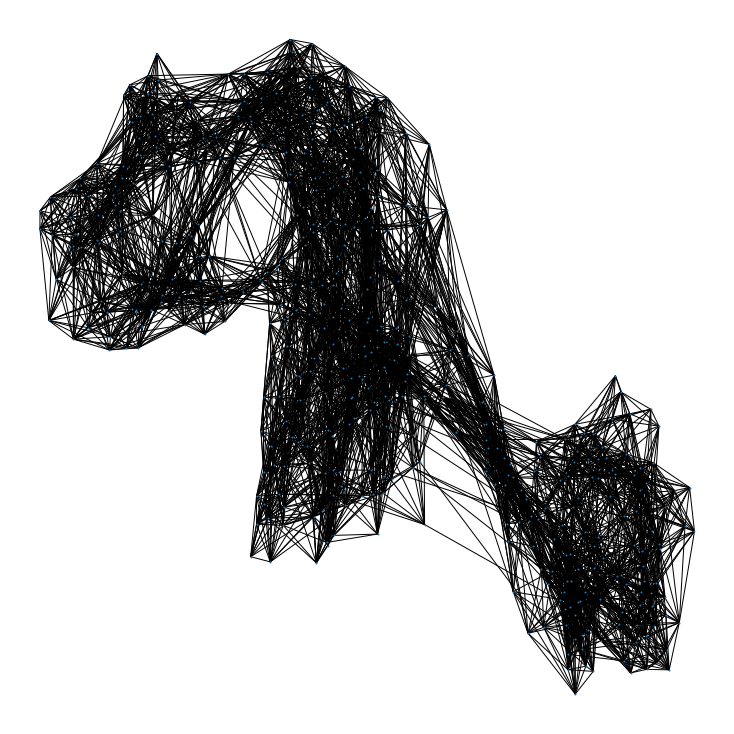

In [7]:
plt.figure(figsize=(10,10))
nx.draw(network.g, node_size=1)
plt.show()

# Structure Network Analyzer

`StructureNetworkAnalyzer` uses `CANetwork` to carry out network wide analysis. As `CANetwork` holds the raw value of structure data, often for various analysis in context of protein structure analysis needs transformation prior to applying graph algorithm. `StructureNetworkAnalyzer` executes these prior preprocessing and perform the graph analysis. 

As an example, `CANetwork` transforms energy value stored on each edges as a positive value, suggesting higher the value stronger the interaction between the residue pair. But for weighted shortest path analysis for finding out energetically favourable contact network chained interaction, we need to transform this edge weights. `CANetwork` by default executes the logic, also allows user to over-ride the logic by exposing various argument option. As an example, the edge weight inversion can be switched off for the analysis by passing the argument `weight_inversion=False`. 

Default behaviour of `CANetwork` API is to carry out weighted analysis. To turn off the weighted analysis, each api interface takes an optional argument `weight`, by setting the `weight=None` will convert the analysis to unweighted analysis.

In [8]:
analyzer = dyn.StructureNetworkAnalyzer(network)

%time central_flow_node = analyzer.node_centrality(centrality=dyn.NodeCentrality.current_flow, normalized=False)
%time central_btw_node = analyzer.node_centrality(centrality=dyn.NodeCentrality.betweenness, normalized=False)
%time central_comm_node = analyzer.node_centrality(centrality=dyn.NodeCentrality.information, normalized=False)
%time central_harmonic_node = analyzer.node_centrality(centrality=dyn.NodeCentrality.harmonic, normalized=False)
%time central_percolation = analyzer.node_centrality(centrality=dyn.NodeCentrality.percolation, normalized=False)
%time central_closeness = analyzer.node_centrality(centrality=dyn.NodeCentrality.closeness, normalized=False)
%time central_eigen = analyzer.node_centrality(centrality=dyn.NodeCentrality.eigen, normalized=False)
%time central_load = analyzer.node_centrality(centrality=dyn.NodeCentrality.load, normalized=False)
%time central_katz = analyzer.node_centrality(centrality=dyn.NodeCentrality.katz, normalized=False)
%time central_subg = analyzer.node_centrality(centrality=dyn.NodeCentrality.subgraph, normalized=False)
%time central_comm = analyzer.node_centrality(centrality=dyn.NodeCentrality.communicability, normalized=False)
%time central_second = analyzer.node_centrality(centrality=dyn.NodeCentrality.second_order, normalized=False)

CPU times: user 10.1 s, sys: 5.26 s, total: 15.4 s
Wall time: 4.05 s
CPU times: user 1.03 s, sys: 116 ms, total: 1.14 s
Wall time: 922 ms
CPU times: user 300 ms, sys: 0 ns, total: 300 ms
Wall time: 301 ms
CPU times: user 275 ms, sys: 151 µs, total: 275 ms
Wall time: 276 ms
CPU times: user 941 ms, sys: 0 ns, total: 941 ms
Wall time: 944 ms
CPU times: user 258 ms, sys: 0 ns, total: 258 ms
Wall time: 259 ms
CPU times: user 47.8 ms, sys: 146 µs, total: 47.9 ms
Wall time: 45.4 ms
CPU times: user 1.02 s, sys: 103 ms, total: 1.12 s
Wall time: 893 ms
CPU times: user 47.5 ms, sys: 2.42 ms, total: 49.9 ms
Wall time: 43.5 ms
CPU times: user 206 ms, sys: 119 ms, total: 325 ms
Wall time: 82.3 ms
CPU times: user 57.8 s, sys: 28.7 s, total: 1min 26s
Wall time: 22.4 s
CPU times: user 2.4 s, sys: 829 ms, total: 3.23 s
Wall time: 888 ms


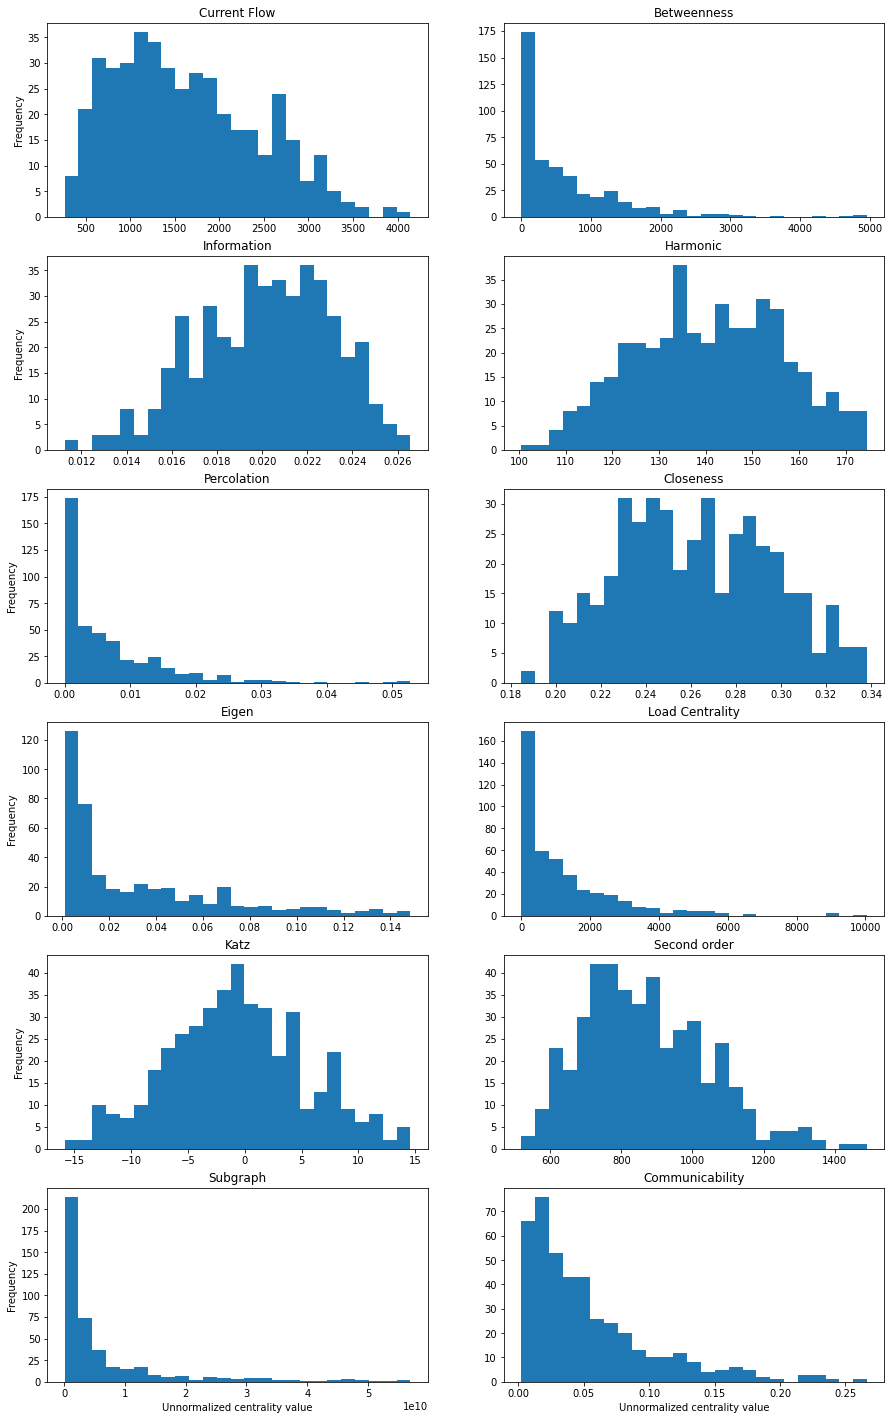

In [9]:
git readme markdown math symbols%matplotlib inline
plt.figure(figsize=(15,25))


plt.subplot(6,2,1)
plt.hist(list(central_flow_node.values()), bins=25)
plt.ylabel('Frequency')
plt.title('Current Flow')

plt.subplot(6,2,2)
plt.hist(list(central_btw_node.values()), bins=25)
plt.title('Betweenness')

plt.subplot(6,2,3)
plt.hist(list(central_comm_node.values()), bins=25)
plt.ylabel('Frequency')
plt.title('Information')

plt.subplot(6,2,4)
plt.hist(list(central_harmonic_node.values()), bins=25)
plt.title('Harmonic')


plt.subplot(6,2,5)
plt.hist(list(central_percolation.values()), bins=25)
plt.ylabel('Frequency')
plt.title('Percolation')

plt.subplot(6,2,6)
plt.hist(list(central_closeness.values()), bins=25)
plt.title('Closeness')


plt.subplot(6,2,7)
plt.hist(list(central_eigen.values()), bins=25)
plt.ylabel('Frequency')
plt.title('Eigen')


plt.subplot(6,2,8)
plt.hist(list(central_load.values()), bins=25)
plt.title("Load Centrality")

plt.subplot(6,2,9)
plt.hist(list(central_katz.values()), bins=25)
plt.ylabel('Frequency')
plt.title('Katz')


plt.subplot(6,2,10)
plt.hist(list(central_second.values()), bins=25)
plt.title('Second order')

plt.subplot(6,2,11)
plt.hist(list(central_subg.values()), bins=25)
plt.ylabel('Frequency')
plt.xlabel('Unnormalized centrality value')
plt.title('Subgraph')


plt.subplot(6,2,12)
plt.hist(list(central_comm.values()), bins=25)
plt.xlabel('Unnormalized centrality value')
plt.title("Communicability")
plt.show()

In [10]:
def central_residues(centralities, q=0.9):
    cutoff = np.quantile(list(centralities.values()), q=q)
    return [key for key, value in centralities.items() if value > cutoff]

In [11]:
quantile = 0.9
flow_top = central_residues(central_flow_node, q=quantile)
btw_top = central_residues(central_btw_node, q=quantile)
comm_top = central_residues(central_comm_node, q=quantile)
har_top = central_residues(central_harmonic_node, q=quantile)

In [12]:
common_central_residues = list(set(flow_top).intersection(btw_top).intersection(comm_top).intersection(har_top))
display("Important residues by multiple centrality measure: {}".format(', '.join(common_central_residues)))

'Important residues by multiple centrality measure: GLU493, LEU301, ASP496, ILE300, SER294, THR298, VAL490, GLY302, ILE303'

# Mutation Analyzer

`MutationAnalyzer` creates an internal representation of mutated structure. It allows single point residue changes from the base structure. Instantiation of this class takes base structure as input. Using `register_mutation` multiple single point mutations can be registered. `register_mutation` takes a valid residue id and valid amino-acid change. The valid amino-acid change corresponds to specification of an amino acid which is different from the base structure. In situation of improper mutation specification the model silently ignores the specified mutation. 
`registered_mutations` API allows access to all registered mutations.

In [13]:
mut_analyzer = dyn.MutationAnalyzer(network)

In [14]:
mut_analyzer.register_mutation(r_id=501, r_name='F')
mut_analyzer.register_mutation(r_id=501, r_name='Q')
mut_analyzer.register_mutation(r_id=501, r_name='A')
mut_analyzer.register_mutation(r_id=501, r_name='W')
mut_analyzer.register_mutation(r_id=501, r_name='A')
mut_analyzer.register_mutation(r_id=5001, r_name='A')
mut_analyzer.registered_mutations

[W501F, W501Q, W501A]

`MutationAnalyzer` allows comparative analysis of various network measure across mutations. The framework internally uses `StructureNetworkAnalyzer` to maintain consistency in the analysis accross different object instance. The `node_centrality`, `edge_centrality`, `mcs` API carry out the network analysis with the same metric specification for consistent comparison. The API responses are generally a `pandas.DataFrame` object in tabular format.

In [15]:
df = mut_analyzer.node_centrality(centrality=dyn.NodeCentrality.current_flow, normalized=False)

In [16]:
display(df.head())

,wild_current_flow,W501F_current_flow,W501Q_current_flow,W501A_current_flow
190,1186.469435,1186.469435,1186.469435,1186.469435
191,1022.035704,1022.035704,1022.035704,1022.035704
192,731.979352,731.979352,731.979352,731.979352
193,986.022918,986.022918,986.022918,986.022918
194,571.859055,571.859055,571.859055,571.859055


Meta-analysis for filtering significant network metric changes due to residue mutation is enabled using `node_centrality_changes`, `edge_centrality_changes` API. These API consumes `MutationAnalyzer` and `MutationGroupAnalyzer` and parameter arguments for the analysis.

In [17]:
changes = dyn.node_centrality_changes(mut_analyzer, 
                                      centrality=dyn.NodeCentrality.betweenness, 
                                      weight='weight',
                                      normalized=False, 
                                      return_all=True)

In [19]:
import pandas as pd
display(pd.DataFrame(changes))

,W501F_betweenness,W501Q_betweenness,W501A_betweenness
positive,[500],"[501, 272, 551, 555, 583, 276, 274]","[499, 298, 500, 271, 308, 302, 311, 502, 274, ..."
negative,"[501, 551]","[499, 502, 496, 302, 500, 556, 275, 297, 298, ...","[501, 272, 551, 267]"


# Markov Cluster

Markov clustering is carried out the weighted protein structure network. The weights are interaction energy. As unlike shortest path analysis higher edge weights in markov clustering suggests higher chance of random walk on that edge, and our main objective to perform markov clustering on protein structure network is discovering strongly connected structural components. Weight inversion is by default is off in this analysis. It must be noted this library uses energy weights in different sense than actual theormodynamics concept, higher weight value corresponds to stronger interaction energy.

In [20]:
%time mcs_clusters = analyzer.mcs(inflation=1.8)

CPU times: user 315 ms, sys: 3.86 ms, total: 319 ms
Wall time: 317 ms


In [21]:
display(pd.DataFrame(mcs_clusters))

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,PRO190,HIS201,LEU202,HIS203,ALA204,PRO205,THR206,GLY207,SER208,GLY209,...,None,None,None,None,None,None,None,None,None,None
1,PRO191,ALA192,VAL193,PRO194,GLN195,SER196,PHE197,GLN198,VAL199,ALA200,...,None,None,None,None,None,None,None,None,None,None
2,THR212,LYS213,VAL214,PRO215,ALA216,ALA217,TYR218,ALA219,ALA220,GLN221,...,None,None,None,None,None,None,None,None,None,None
3,HIS293,SER294,THR295,THR324,PRO325,PRO326,GLY327,SER328,VAL329,THR330,...,None,None,None,None,None,None,None,None,None,None
4,ASP296,ALA297,THR298,ILE300,LEU301,GLY302,ILE303,GLY304,THR305,ASP308,...,None,None,None,None,None,None,None,None,None,None
5,VAL331,PRO332,HIS333,PRO334,ASN335,ILE336,GLU337,GLU338,VAL339,HIS364,...,None,None,None,None,None,None,None,None,None,None
6,ALA340,LEU341,SER342,THR343,THR344,GLY345,GLU346,ILE347,PRO348,PHE349,...,None,None,None,None,None,None,None,None,None,None
7,ILE359,LYS360,GLY361,GLY362,ARG363,ILE366,PHE367,CYS368,HIS369,SER370,...,None,None,None,None,None,None,None,None,None,None
8,THR433,GLN434,THR435,VAL436,ASP437,PHE438,SER439,LEU440,ASP441,PRO442,...,ILE615,THR616,LYS617,TYR618,ILE619,MET620,THR621,CYS622,MET623,SER624


## Marking Markov Clusters on Protein Structure

Marking markov clusters on structure.

In [23]:
ca_marked = analyzer.structure
n = len(mcs_clusters)
display("Number of cluster detected: {}".format(n))

dt = 99 // (n-1)
marks = [dt * i for i in range(n)]
np.random.shuffle(marks)

for i, group in enumerate(mcs_clusters):
    ca_marked = dyn.mark_by_bfactor(ca_marked, residues=[int(n[3:]) for n in group], mark=marks[i], skip_other=True)
    
b_obj = dyn.convert_to_biopython(ca_marked)
view = ngl.show_biopython(b_obj)
view.representations = [{"type": "cartoon", "params":{"colorScheme": "bfactor"}}]
view

'Number of cluster detected: 9'

NGLWidget()

# Mutation Analyzer with group definition

In [24]:
group_analyzer = dyn.MutationGroupAnalyzer(network, 
                                           subgraph_method=dyn.InducedGraphExtractor.percolation, 
                                           max_inflation=1.5)

In [25]:
%time group_analyzer.register_group([255], name='r255')
%time group_analyzer.register_group([451], name='r451')
%time group_analyzer.register_group([556], name='r556')

display(group_analyzer.registered_groups)

CPU times: user 233 µs, sys: 101 µs, total: 334 µs
Wall time: 336 µs
CPU times: user 73.5 ms, sys: 20.6 ms, total: 94.1 ms
Wall time: 2.33 s
CPU times: user 91.9 ms, sys: 7.99 ms, total: 99.9 ms
Wall time: 2.44 s


['r255', 'r451', 'r556']

In [26]:
residues = group_analyzer.common_residues('r255', 'r451', 'r556')
marked_structure = dyn.mark_by_bfactor(group_analyzer.structure, residues=[int(r[3:]) for r in residues], mark=50)
mol = dyn.convert_to_biopython(marked_structure)
view = ngl.show_biopython(mol)
view.representations = [{"type": "ball+stick", "params":{ "sele": "protein", "colorScheme": "bfactor"}}]
view

NGLWidget()

In [27]:
residues = [int(n[3:]) for n in group_analyzer.subgraph('r255', 'r451').nodes]
marked_structure = dyn.mark_by_bfactor(group_analyzer.structure, residues=residues, mark=50)
mol = dyn.convert_to_biopython(marked_structure)
view = ngl.show_biopython(mol)
view.representations = [{"type": "ball+stick", "params":{ "sele": "protein", "colorScheme": "bfactor"}}]
view

NGLWidget()